# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dhea Rachma Febiana
- **Email:** mc006d5x2410@student.devacademy.id
- **ID Dicoding:** MC006D5X2410

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda mencapai angka tertinggi dan terendah selama tahun 2011-2012?
- Apa faktor-faktor yang paling memengaruhi jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan selama tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

## Data Wrangling

### Gathering Data

In [88]:
day_df = pd.read_csv("day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
hour_df = pd.read_csv("hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv memiliki satu baris per hari, sedangkan hour.csv memiliki satu baris per jam.
- Terdapat total 731 hari data, yang mencakup dua tahun (2011 dan 2012)
- Kolom season menunjukkan bahwa data mencakup semua musim. Sehingga memungkinkan analisis penyewaan sepeda berdasarkan faktor musiman.

### Assessing Data

In [90]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [91]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [92]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [93]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [94]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [95]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [96]:
print("jumlah Duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value
- Jumlah duplikasi untuk setiap data adalah 0, berarti tidak ada data yang duplikat.

### Cleaning Data

In [97]:
day_df.drop_duplicates(inplace=True)

In [98]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [99]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])


In [100]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [101]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [102]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [103]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(season_mapping)

**Insight:**
- Mengonversi kolom dteday ke format datetime yang sebelumnya merupakan tipe data object. Dilakukan untuk memungkinkan analisis tren berdasarkan hari, bulan, atau tahun secara lebih efisien.
- Format datetime memudahkan pembuatan visualisasi yang berhubungan dengan waktu, yaitu seperti grafik yang menunjukkan tren penyewaan sepeda dari waktu ke waktu.
- Mengubah data numerik menjadi kategori yang lebih bermakna dan memperbaiki keterbacaan data tanpa mengubah struktur analisis

## Exploratory Data Analysis (EDA)

### Explore ...

In [104]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [105]:
season_stats = day_df.groupby("season")["cnt"].agg(["mean", "median", "min", "max", "std"]).sort_values(by="mean", ascending=False)
season_stats


,mean,median,min,max,std
season,,,,,
Fall,5644.303191,5353.5,1115,8714,1459.800381
Summer,4992.331522,4941.5,795,8362,1695.977235
Winter,4728.162921,4634.5,22,8555,1699.615261
Spring,2604.132597,2209.0,431,7836,1399.942119


In [106]:
workingday_stats = day_df.groupby("workingday")["cnt"].agg(["mean", "median", "min", "max", "std"])
workingday_stats


,mean,median,min,max,std
workingday,,,,,
0,4330.168831,4459.0,605,8714,2052.141245
1,4584.820000,4582.0,22,8362,1878.415583


In [107]:
correlation_matrix = day_df[["cnt", "temp", "atemp", "hum", "windspeed", "weathersit", "workingday"]].corr()
correlation_matrix["cnt"].sort_values(ascending=False)


,cnt
cnt,1.000000
atemp,0.631066
temp,0.627494
workingday,0.061156
hum,-0.100659
windspeed,-0.234545
weathersit,-0.297391


**Insight:**
- Musim Gugur (Fall) memiliki rata-rata penyewaan tertinggi (5,644) diikuti oleh Musim Panas (Summer) (4,992), Musim Dingin (Winter) (4,728), dan Musim Semi (Spring) (2,604).
- Variabilitas penyewaan (dilihat dari standar deviasi) juga tertinggi pada musim panas dan dingin.
- Rata-rata penyewaan pada hari kerja (4,585) sedikit lebih tinggi dibandingkan dengan akhir pekan (4,330).
- Terdapat korelasi positif kuat antara jumlah penyewaan sepeda (cnt) dengan suhu (temp = 0.63) dan suhu terasa (atemp = 0.63).
- Cuaca buruk (weathersit) memiliki korelasi negatif (-0.30), menunjukkan bahwa saat cuaca buruk (hujan, kabut, salju), jumlah penyewaan sepeda cenderung turun.
- Kecepatan angin (windspeed) juga memiliki korelasi negatif (-0.23), menunjukkan bahwa semakin tinggi kecepatan angin, semakin sedikit orang yang menyewa sepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

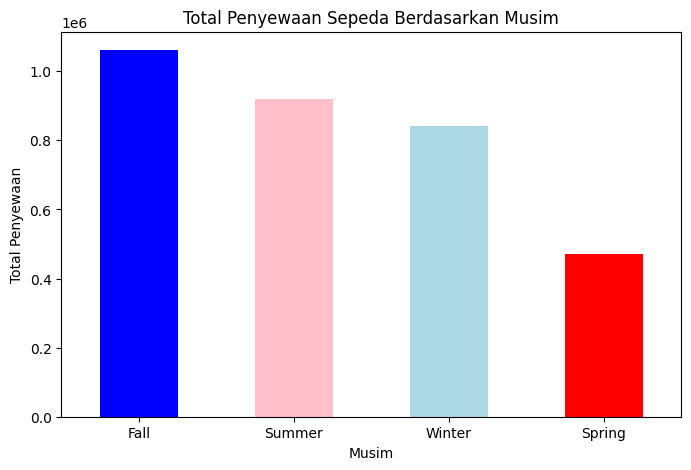

In [109]:
total_season = day_df.groupby("season")["cnt"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = total_season.plot(kind="bar", color=["blue", "pink", "lightblue", "red"])

plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(rotation=0)

plt.show()

### Pertanyaan 2:

<ipython-input-110-d1c119ea7ab1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Weekend", "Weekday"], y=workingday_stats["mean"], palette="Set1")


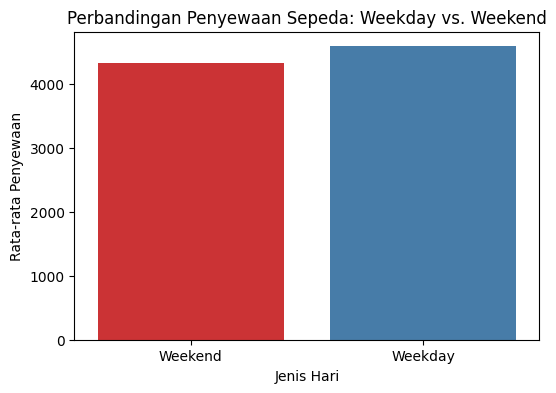

In [110]:
plt.figure(figsize=(6,4))
sns.barplot(x=["Weekend", "Weekday"], y=workingday_stats["mean"], palette="Set1")
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Perbandingan Penyewaan Sepeda: Weekday vs. Weekend")
plt.show()

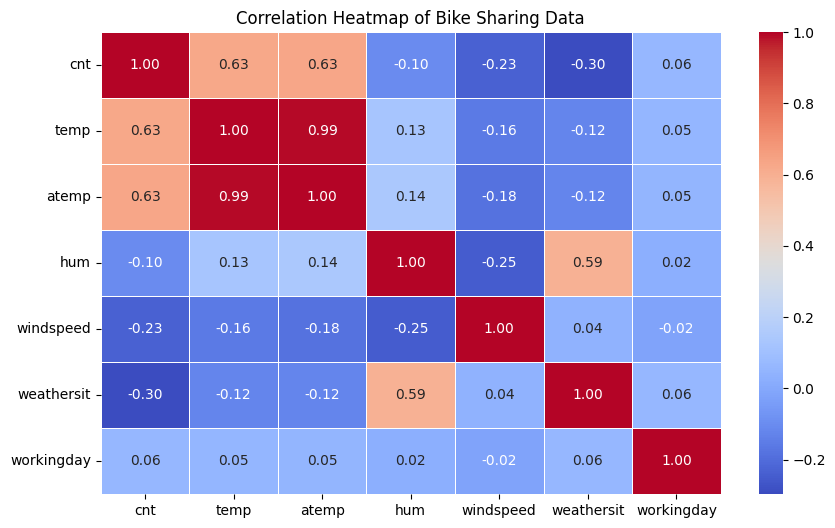

In [111]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Bike Sharing Data")
plt.show()

**Insight:**
- Musim dengan rata-rata penyewaan sepeda tertinggi adalah musim gugur (Fall) dengan 5.644 penyewaan per hari.
- Musim dengan penyewaan terendah adalah musim semi (Spring) dengan 2.604 penyewaan per hari, hampir setengah dari penyewaan pada musim gugur.
- Musim panas (Summer) dan musim dingin (Winter) memiliki jumlah penyewaan rata-rata 4.992 dan 4.728 per hari.
- Perbedaan tertinggi dalam penyewaan terjadi antara musim gugur (5.644) dan musim semi (2.604) dengan selisih 3.040 penyewaan per hari.
- Rata-rata penyewaan pada hari kerja adalah 4.584 penyewaan per hari, lebih tinggi dibandingkan dengan akhir pekan (4.330 penyewaan per hari)
- Suhu yang dirasakan (atemp) memiliki korelasi tertinggi terhadap penyewaan sepeda dengan nilai 0.63. Ini berarti semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.
- Suhu sebenarnya (temp) juga memiliki korelasi tinggi sebesar 0.63, menegaskan bahwa cuaca yang lebih panas cenderung meningkatkan jumlah peminjaman sepeda.
- Kondisi cuaca (weathersit) memiliki korelasi negatif sebesar -0.30, yang berarti cuaca buruk mengurangi jumlah penyewaan.
- Kecepatan angin (windspeed) memiliki korelasi -0.23, menunjukkan bahwa angin kencang sedikit mengurangi jumlah penyewaan.
- Hari kerja (workingday) memiliki korelasi 0.06, yang menunjukkan bahwa ada sedikit perbedaan jumlah penyewaan antara hari kerja dan akhir pekan, tetapi tidak terlalu signifikan.


## Analisis Lanjutan (Opsional)

In [116]:
day_df = pd.read_csv("day.csv")


In [117]:
grouped_data = day_df.groupby(["weekday", "season"])["cnt"].mean().reset_index()

In [118]:
print(grouped_data)

    weekday  season          cnt
0         0       1  2229.444444
1         0       2  4986.538462
2         0       3  5324.269231
3         0       4  4451.961538
4         1       1  2452.730769
5         1       2  4565.000000
6         1       3  5627.192308
7         1       4  4698.846154
8         2       1  2792.520000
9         2       2  4824.961538
10        2       3  5656.111111
11        2       4  4658.923077
12        3       1  2611.080000
13        3       2  4835.074074
14        3       3  5853.851852
15        3       4  4766.800000
16        4       1  2894.200000
17        4       2  5200.269231
18        4       3  5698.607143
19        4       4  4730.880000
20        5       1  2856.307692
21        5       2  5222.769231
22        5       3  5750.629630
23        5       4  4898.680000
24        6       1  2432.333333
25        6       2  5334.192308
26        6       3  5584.962963
27        6       4  4906.040000


Teknik analisis yang digunakan adalah teknik pengelompokan dan agregasi (Grouping & Aggregation) untuk menganalisis pola jumlah penyewaan sepeda berdasarkan hari dalam seminggu (weekday) dan musim (season).
Adapun tujuan analisis ini yaitu:
1. Mengetahui Pola Penyewaan Sepeda Berdasarkan Hari dan Musim. Analisis ini membantu memahami apakah penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan, serta bagaimana musim memengaruhi jumlah penyewaan.
2. Membantu Pengambilan Keputusan.
Dengan mengetahui kapan permintaan tinggi/rendah, operator bisa mengoptimalkan jumlah sepeda yang tersedia pada waktu dan musim tertentu.
3. Mengidentifikasi Dampak Musim terhadap Perilaku Pengguna.
Data ini menunjukkan bagaimana cuaca memengaruhi jumlah pengguna, misalnya apakah penyewaan lebih tinggi di musim panas dibanding musim dingin.

Outputnya yaitu berupa tabel yang menunjukkan rata-rata jumlah penyewaan sepeda (cnt) untuk setiap kombinasi hari dalam seminggu (weekday) dan musim (season).

Setiap baris merepresentasikan kombinasi hari dan musim tertentu, dengan nilai cnt sebagai jumlah penyewaan rata-rata.


## Conclusion

A. Pengaruh Musim terhadap Total Penyewaan Sepeda

Berdasarkan hasil analisis yang telah dilakukan, disimpulkan bahwa musim penyewaan tertinggi adalah musim gugur (fall) yaitu lebih dari 1 juta penyewaan, diikuti oleh musim panas (Summer), musim dingin (Winter), dan terakhir yang terendah adalah musim semi (Spring) kurang dari 500 ribu. Penyewaan sepeda yang tinggi pada musim gugur(fall) dapat disebabkan oleh kondisi cuaca yang lebih nyaman dibandingkan musim lainnya.

Analisis:

1. Musim gugur (Fall) memiliki jumlah penyewaan tertinggi karena kemungkinan cuaca yang lebih stabil, dengan suhu yang masih nyaman untuk bersepeda tanpa cuaca ekstrem seperti panas berlebihan atau hujan deras.

2. Musim semi (Spring) memiliki jumlah penyewaan terendah, kemungkinan disebabkan oleh kondisi cuaca yang kurang ideal, seperti curah hujan lebih tinggi atau suhu yang masih cenderung dingin.

3. Musim panas (Summer) dan musim dingin (Winter) juga memiliki tingkat penyewaan yang cukup tinggi, tetapi masih di bawah musim gugur. Musim panas yang memiliki suhu lebih tinggi tetap menarik banyak pengguna, sementara musim dingin masih memiliki peminat meskipun lebih rendah dari musim gugur.

Rekomendasi:
- Pada musim gugur dan musim panas, layanan penyewaan sepeda dapat meningkatkan kapasitas/jumlah sepeda untuk mengakomodasi permintaan yang lebih tinggi.

- Pada musim semi, buat strategi yang bisa menarik customer seperti diskon atau promosi yang dapat diterapkan untuk meningkatkan minat pengguna.

- Jika memungkinkan, tambahkan layanan lain seperti misal penyediaan perlengkapan seperti jaket atau perlengkapan hujan yang bisa menjadi solusi pada musim dengan cuaca kurang mendukung.

B. Faktor-faktor yang paling memengaruhi jumlah penyewaan sepeda pada Weekday vs Weekend
Dari diagram batang kedua, terlihat bahwa jumlah rata-rata penyewaan sepeda pada hari kerja (Weekday) sedikit lebih tinggi dibandingkan pada akhir pekan (Weekend).

Analisis:

1. Penggunaan sepeda pada weekday lebih tinggi, kemungkinan besar karena orang-orang menggunakan sepeda sebagai alat transportasi utama untuk bekerja atau beraktivitas sehari-hari.

2. Pada weekend, meskipun masih cukup tinggi, jumlahnya sedikit lebih rendah, mungkin karena penggunaan sepeda lebih banyak untuk rekreasi atau aktivitas santai.

Lalu berdasarkan heatmap korelasi, terdapat beberapa faktor utama yang memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, yaitu:
- Suhu (temp) dan suhu yang dirasakan (atemp) memiliki korelasi tinggi (~0.63) terhadap penyewaan sepeda.
Artinya, semakin hangat suhu udara, semakin banyak sepeda yang disewa. Cuaca yang nyaman mendorong lebih banyak orang untuk menggunakan sepeda.

- Kondisi cuaca (weathersit) memiliki korelasi negatif (-0.30) terhadap jumlah penyewaan sepeda. Artinya, Cuaca buruk (hujan, kabut) mengurangi jumlah penyewaan secara signifikan.

- Kecepatan angin (windspeed) juga berdampak negatif (-0.23), yang menunjukkan bahwa kondisi berangin dapat mengurangi keinginan orang untuk bersepeda.

- Hari kerja (workingday) memiliki korelasi yang sangat kecil (0.06) terhadap jumlah penyewaan, yang berarti pola penyewaan hampir merata antara weekday dan weekend.

Rekomendasi:
- Layanan penyewaan dapat menyesuaikan strategi penyewaan pada weekday dengan meningkatkan ketersediaan sepeda di pagi dan sore hari (waktu commuting).
- Untuk weekend, bisa ditingkatkan promosi paket wisata bersepeda atau program sewa harian yang lebih fleksibel agar lebih menarik bagi pengguna yang ingin bersepeda santai.
- Prediksi penyewaan sepeda dapat dibuat berdasarkan suhu dan kondisi cuaca, sehingga operator layanan dapat menyesuaikan jumlah sepeda yang tersedia pada hari-hari tertentu.
- Saat terprediksi kondisi cuaca buruk, layanan dapat memberikan opsi tambahan seperti sepeda dengan penutup atau promosi khusus untuk menarik lebih banyak pengguna.


In [83]:
all_df.to_csv("all_data.csv", index=False)

In [84]:
from google.colab import files
files.download("all_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>